### Introduction to Neural Network classification

+ A classification is where you try to classify something as one thing or another.
+ Few types of classification problems are :
    + Binary Classification
    + Multiclass Classification
    + Multilabel Classification

#### Create data to view and fit.

In [32]:
from sklearn.datasets import make_circles

In [33]:
n_samples = 1000
X,y=make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)


In [34]:
import pandas as pd

In [35]:
circles = pd.DataFrame({
    "X0":X[:,0],
    "X1":X[:,1],
    "label":y
})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


Visualize with a plot


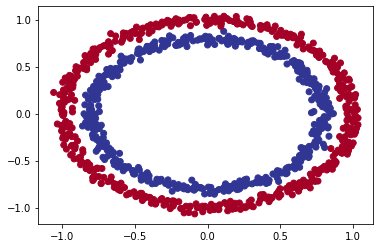

In [36]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


### Input and output shape of data


In [37]:
X.shape, y.shape

((1000, 2), (1000,))

In [38]:
import tensorflow as tf


In [39]:
## Steps in modelling

## Creare a model
tf.random.set_seed(42)
model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.1170 - accuracy: 0.4770
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 3.8036 - accuracy: 0.4770
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.9073 - accuracy: 0.5150
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.5100
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4900


In [40]:
## Let's train for long
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [41]:
X[0].shape

(2,)

In [42]:
# # Set the random seed
# tf.random.set_seed(42)

# model_2 = tf.keras.Sequential(
#     tf.keras.layers.Dense(1),
#     tf.keras.layers.Dense(1)
# )

# model_2.compile(
#     loss=tf.keras.losses.BinaryCrossentropy(),
#     optimizer=tf.keras.optimizers.SGD(),
#     metrics=['accuracy']
# )

# model_2.fit(X, y, epochs=100, verbose=0)


### Improving a model

+ Create a model - Add more layers | Increase number of hidden layers

+ Compiling a model - Choose a different optimization function(Adam) | 
+ Fitting a model - Fit our model for longer


In [43]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)




In [44]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5140


[0.6966965198516846, 0.5139999985694885]

Create a mesh-grid of different X Values
+ Plot prediction as well as line between different zones

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    x_in = np.c_[(xx.ravel(), yy.ravel())]

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print('Doing multi-class')
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('Doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 1s 2ms/step
Doing binary classification


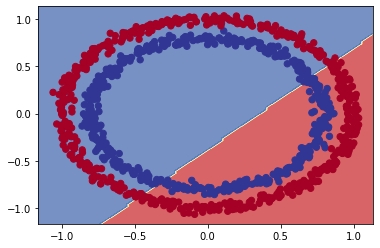

In [47]:
plot_decision_boundary(model=model_3,X=X,y=y)

In [48]:
tf.random.set_seed(42)

x_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5)
x_reg_train = x_reg[:150]
x_reg_test = x_reg[150:]

y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

In [49]:
x_reg_train.shape

TensorShape([150])

In [50]:
# model_3.fit(x_reg_train,y_reg_train,epochs=100)

In [51]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100, verbose=0)

2/2 [==============================] - 0s 5ms/step


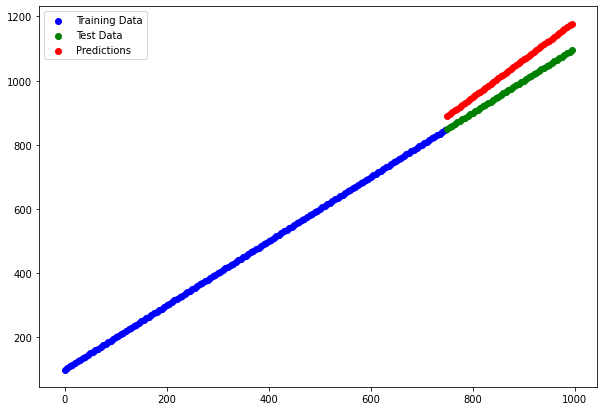

In [52]:
y_reg_pred = model_3.predict(x_reg_test)


plt.figure(figsize=(10,7))
plt.scatter(x_reg_train,y_reg_train,c="b",label="Training Data")
plt.scatter(x_reg_test,y_reg_test,c="g",label="Test Data")
plt.scatter(x_reg_test,y_reg_pred,c='r',label="Predictions")
plt.legend();


 Classification model fails because of Non-linearity | 

In [53]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_4.fit(X,y,epochs=100,verbose=0)

In [54]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.8021 - accuracy: 0.4860


[0.8020793199539185, 0.4860000014305115]

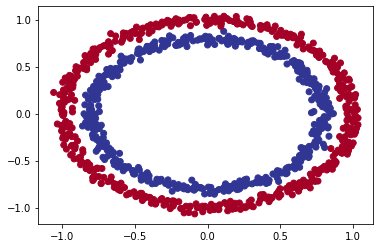

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


313/313 [==============================] - 1s 2ms/step
Doing binary classification


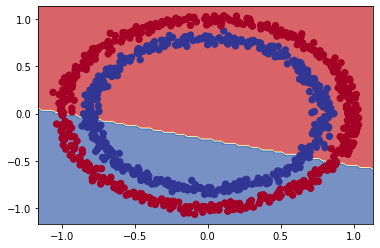

In [56]:
plot_decision_boundary(model=model_4,X=X,y=y)

### Let's try build out first neural network with non linearity

In [60]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.Adam(lr=0.001),
metrics=['accuracy'])

history = model_5.fit(X,y,epochs=100,verbose=0)

313/313 [==============================] - 1s 3ms/step
Doing binary classification


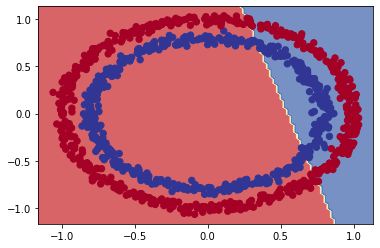

In [61]:
plot_decision_boundary(model=model_5,X=X,y=y);

### Another model with more hidden layer and neurons

In [68]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

history = model_6.fit(X,y,epochs=250, verbose=0)

In [69]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.5000


[0.1648225039243698, 0.5]

313/313 [==============================] - 1s 2ms/step
Doing binary classification


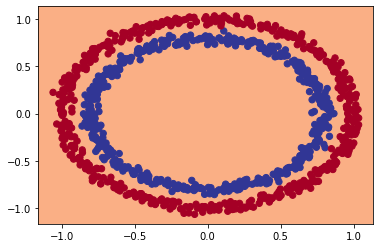

In [70]:
plot_decision_boundary(model=model_6,X=X,y=y);

### Activation function for output layers

In [71]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5050
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.5150
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.5130
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.5150
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.5270
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5330
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.5400
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.5380
Epoch 11/

In [72]:
# Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2749 - accuracy: 0.9830


[0.274899423122406, 0.9829999804496765]

313/313 [==============================] - 1s 2ms/step
Doing binary classification


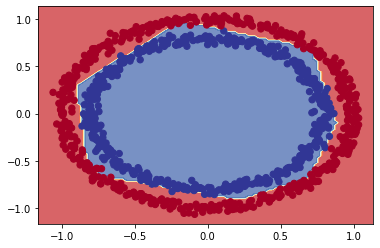

In [73]:
# Visualize

plot_decision_boundary(model_7,X,y)

A combination of linear and non linear function is one of the key fundamentals of neural networks.

Create a **Toy** tensors

In [74]:
A =tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

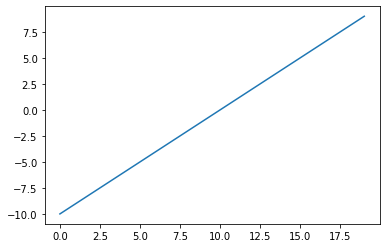

In [75]:
# Visualize
plt.plot(A)

In [89]:
# Activation functions

def sigmoid(x):
    return 1/(1+tf.exp(-x))

def relu(x):
    return tf.maximum(0,x)

def liner(x):
    return tf.keras.activations.linear(x)

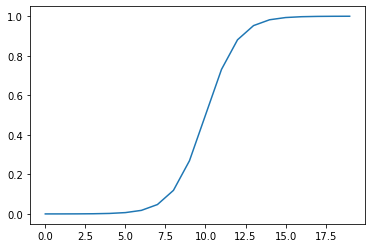

In [90]:
sigmod_function = sigmoid(A)
plt.plot(sigmod_function)

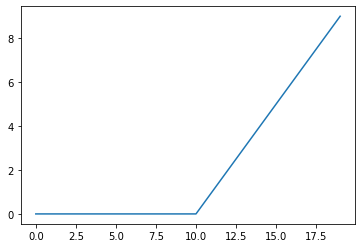

In [91]:
relu_function = relu(A)
plt.plot(relu_function)

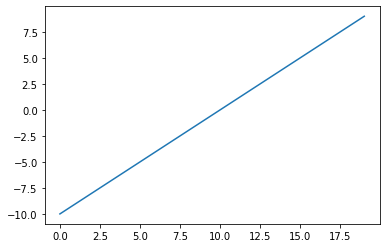

In [93]:
linear_fun = liner(A)
plt.plot(linear_fun)

In [95]:
A == liner(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

-------

So far we have been testing and training on the same dataset. Now let's work on test and train dataset

In [99]:
# Evaluating and improving classification model
#Split into train and test set

X_train,y_train = X[:800],y[:800]
X_test, y_test = X[800:],y[800:]
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [136]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

hsitory2 = model_8.fit(X_train,y_train,epochs=25)


Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7037 - accuracy: 0.4975
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4437
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4787
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5013
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5163
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5412
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5688
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.6913
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.7425
Epoch 11/25
25/25 [

In [137]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9850


[0.1364845633506775, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


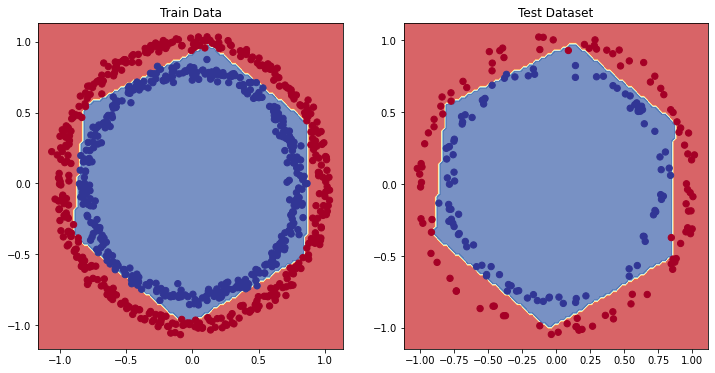

In [138]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Data")
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test Dataset")
plot_decision_boundary(model_8,X_test,y_test)

In [139]:
model_8.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 4)                 12        
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


Visualise using history

<AxesSubplot:>

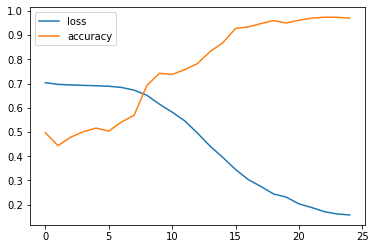

In [144]:
# Convert history obj into DataFrame
pd.DataFrame(hsitory2.history).plot()

🗝️ For many problems, loss function getting down means model is improving